# Sample Size and Power

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms  # Note this is a new addition
import statsmodels.graphics.api as smg

sns.set_style('whitegrid')

In [2]:
# Plot of two-sided test distributions with alpha and beta
def plot_confidence_power(mu0=5, sigma=1, delta=1, n=10, alpha=.05):
    '''
    Plots the t sampling distribution for the null and alternative hypothesis 
    assuming a specific delta. Calculates and plots alpha and beta.

    Inputs
    mu0    : the hypothesized mean (H0)
    sigma  : the assumed population standard deviation
    delta  : the deviation from mu0 being considered
    n      : the sample size
    alpha  : the significance level

    Outputs
    fig    : the figure generated
    ax     : the axis in the figure
    '''
    mu2 = mu0 + delta
    sigma2 = sigma

    sem1 = sigma / np.sqrt(n)
    sem2 = sigma2 / np.sqrt(n)
    dist1 = stats.t(loc=mu0, scale=sem1, df=n-1)
    dist2 = stats.t(loc=mu2, scale=sem2, df=n-1)

    pdf_x = np.linspace(start=min(mu0,mu2)-4*max(sem1,sem2), 
                        stop=max(mu0,mu2)+4*max(sem1,sem2), 
                        num=1000)  
    pdf1 = [(dist1.pdf(x=x)) for x in pdf_x]
    pdf2 = [(dist2.pdf(x=x)) for x in pdf_x]

    fig, ax = plt.subplots(figsize=(6,3))
    ax.plot(pdf_x, pdf1, label=f'N$(\mu={mu0}, \sigma ={sigma})$')
    ax.plot(pdf_x, pdf2, label=f'N$(\mu={mu2}, \sigma ={sigma2})$')

    # Plot alpha area
    fill_alpha_left = np.linspace(start=pdf_x[0], 
                                  stop=dist1.ppf(alpha/2), 
                                  num=1000)
    fill_left = [(dist1.pdf(x=x)) for x in fill_alpha_left]
    ax.fill_between(x=fill_alpha_left, 
                    y1=0, 
                    y2=fill_left, 
                    color='C0', 
                    alpha=0.3, 
                    label=r'$\alpha = $'+f'{alpha:.2f}')
    fill_alpha_right = np.linspace(start=dist1.ppf(1-alpha/2), 
                                   stop=pdf_x[999], 
                                   num=1000)
    fill_right = [(dist1.pdf(x=x)) for x in fill_alpha_right]
    ax.fill_between(x=fill_alpha_right, 
                    y1=0, 
                    y2=fill_right, 
                    color='C0', 
                    alpha=0.3)

    # Plot beta area
    fill_beta_x = np.linspace(start=dist1.ppf(alpha/2), 
                              stop=dist1.ppf(1-alpha/2), 
                              num=1000)
    fill_beta = [(dist2.pdf(x=x)) for x in fill_beta_x]
    beta = dist2.cdf(x=dist1.ppf(1-alpha/2)) - dist2.cdf(x=dist1.ppf(alpha/2))
    ax.fill_between(x=fill_beta_x, 
                    y1=0, 
                    y2=fill_beta, 
                    color='C1', 
                    alpha=0.3, 
                    label=r'$\beta = $' + f'{beta:.3f}')

    # Reference lines if desired for comparison (from building slides)
    # ax.axvline(x=stats.t.ppf(q=0.975, loc=5, scale=1/np.sqrt(5), df=4), color='red', linestyle='--')
    # ax.axvline(x=stats.t.ppf(q=0.975, loc=5, scale=1/np.sqrt(10), df=9), color='orange', linestyle='--')
    # ax.axvline(x=stats.t.ppf(q=0.975, loc=5, scale=1/np.sqrt(16), df=15), color='green', linestyle='--')

    # Tweak graphic
    ax.set_title(r'Two sampling distributions ($t$) showing $\alpha$ and $\beta$ for $n = $'+f'{n}')
    ax.set_ylabel('pdf')
    ax.set_xlabel('x')
    ax.set_xlim(pdf_x[0],pdf_x[999])
    ax.legend(bbox_to_anchor=(1.1,1))
    fig.tight_layout()
    return fig, ax



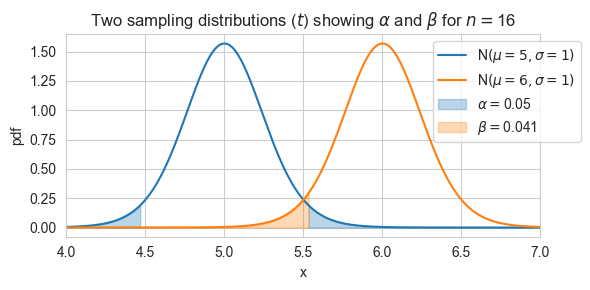

In [4]:
fig, ax = plot_confidence_power(n=16)
plt.show()

In [5]:
effect_size = 1     # delta
nobs = None         # n
alpha = 0.05        # significance
power = 0.95        # 1 - beta
sms.tt_solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, alternative='two-sided')


15.06309038440813

In [6]:
math.ceil(sms.tt_solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, alternative='two-sided'))

16

In [7]:
# using a z test
sms.zt_ind_solve_power(effect_size=effect_size,nobs1=nobs,alpha=alpha, power=power, alternative='two-sided',ratio=0)

12.994709103169532

---
# Progress Check

In [9]:
alpha = 0.1
power = .8
delta = 1.5
sigma = 2
effect_size = delta / sigma
nobs = None

sms.tt_solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, alternative='larger')

8.95295176839223

In [10]:
alpha = 0.1
power = .9
delta = 1
sigma = 2
effect_size = delta / sigma
nobs = None

sms.tt_solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, alternative='larger')

27.138473534742896

In [13]:
alpha = 0.1
power = .9
sigma = 2
effect_size = None
nobs = 42

ef_size = sms.tt_solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, alternative='larger')
delta = ef_size * sigma
delta * 60


47.94490778777926